In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [49]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [50]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [51]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1 , inplace = True )

In [52]:
df.rename(columns={"v1": "class", "v2": "text"}, inplace=True)


In [53]:
df["class"] = df["class"].map({"ham":0,"spam":1})

In [54]:
df

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [58]:

x_train, x_test,y_train, y_test = train_test_split(df["text"], df["class"].values, test_size=0.75)


In [59]:
tokenizer = Tokenizer(num_words=20000)

tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)

x_test = tokenizer.texts_to_sequences(x_test)


In [63]:
V = len(tokenizer.word_index)

In [70]:
x_train = pad_sequences(x_train)

T = x_train.shape[1]


In [68]:
x_test = pad_sequences(x_test, maxlen=x_train.shape[1])

In [78]:
i = Input(shape = (T,))
x = Embedding(V+1, 30)(i)
x = LSTM(10,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(i,x)

model.compile(loss= "binary_crossentropy",metrics = ["accuracy"], optimizer = "adam" )

r = model.fit(x_train,y_train , validation_data = (x_test, y_test), epochs = 20)



Epoch 1/20
44/44 [==============================] - 5s 66ms/step - loss: 0.5954 - accuracy: 0.8643 - val_loss: 0.4722 - val_accuracy: 0.8665
Epoch 2/20
44/44 [==============================] - 2s 55ms/step - loss: 0.4122 - accuracy: 0.8643 - val_loss: 0.3775 - val_accuracy: 0.8665
Epoch 3/20
44/44 [==============================] - 3s 59ms/step - loss: 0.3490 - accuracy: 0.8643 - val_loss: 0.3096 - val_accuracy: 0.8665
Epoch 4/20
44/44 [==============================] - 3s 65ms/step - loss: 0.2564 - accuracy: 0.8643 - val_loss: 0.2241 - val_accuracy: 0.8665
Epoch 5/20
44/44 [==============================] - 2s 54ms/step - loss: 0.1687 - accuracy: 0.9505 - val_loss: 0.1653 - val_accuracy: 0.9646
Epoch 6/20
44/44 [==============================] - 2s 54ms/step - loss: 0.1114 - accuracy: 0.9907 - val_loss: 0.1294 - val_accuracy: 0.9710
Epoch 7/20
44/44 [==============================] - 2s 54ms/step - loss: 0.0780 - accuracy: 0.9943 - val_loss: 0.1143 - val_accuracy: 0.9734
Epoch 8/20
44

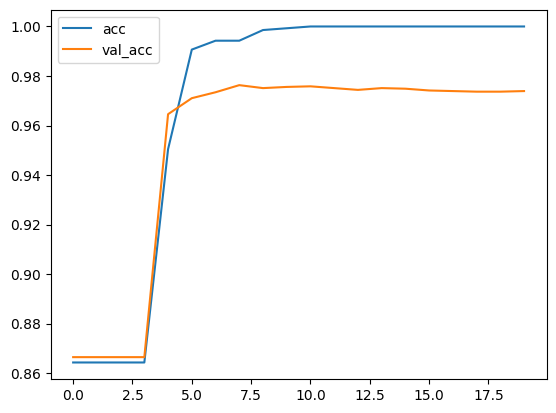

In [79]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()